# Importing Libraries

Python libraries provide a lot of the useful functionality we need. **numpy** contains a whole lot of functions for managing and operating on arrays of data and we will almost always want that capability. Many examples import numpy as np, so you can see explicitly what functions come from numpy.

Importing a library and giving it a name lets you be sure which library you are using functions from. For example, there might be multiple different functions called sin( ) in different libraries, and you might want to be sure you were using the version from the numpy library so it would work with numpy arrays and not just single values as arguments.

In [2]:
# automatically draws plots on the notebook without calling plt.show()
%matplotlib inline

# lets you refer to all the elements of matplotlib.pyplot as plt.something
import matplotlib.pyplot as plt   

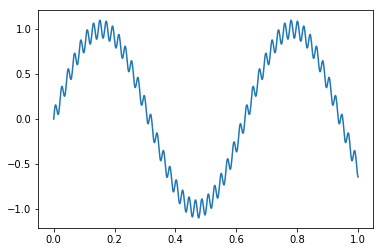

In [3]:
# lets you refer to all the elements of numpy as np.something
import numpy as np

t = np.linspace(0,1,1000)  # time of measurement
# Simulate a low frequency signal with added higher frequency noise 
T = np.sin(10*t) + np.sin(300*t)/10
plt.plot(t,T)

Keep in mind that when you run a cell, anything it did persists in the workspace until a reset. That means import a library and it stays imported until you choose Kernel/Restart from the menu. Down below you can look at several different ways you might import some stuff from libraries. Restart the Kernel to get a fresh start while experimenting with the different options.

You can import all the functions from numpy and matplotlib.pyplot this way, and use them without the 'np.' and 'plt.' prefixes. The code here does some simple exponential smoothing on the data and plots a graph with some labels.

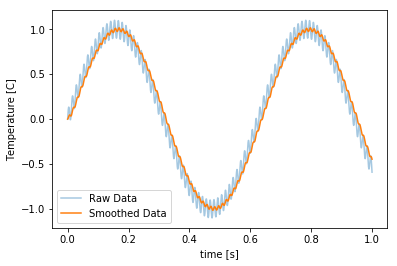

In [4]:
from numpy import *
from matplotlib.pyplot import *

t = linspace(0,1,2000)     # time of measurement
# Simulate a low frequency signal with added higher frequency noise 
T = sin(10*t) + sin(500*t)/10

tau = 0.01
Ts = T.copy()              # another vector for the smoothed data
for i in range(1,len(Ts)): # here's where the actual smoothing happens
    dt = t[i]-t[i-1]
    w = min(dt/tau,1)
    Ts[i] = Ts[i-1] * (1-w) + T[i] * w
plot(t,T, alpha = 0.4, label = 'Raw Data')
plot(t,Ts, label = 'Smoothed Data')
xlabel('time [s]')
ylabel('Temperature [C]')
legend()

I'm leaning towards importing all of numpy and matplotlib.pyplot this way so that I can refer to them directly. I have been getting tired of getting name errors when I forget to put the np. on the front.

The downside is that it may fail if I cut and paste code from examples where they were imported as plt and np, but I think I can deal with that. Your choice is up to you, but the way you refer to functions has to match the way you import them. (Unless, of course you import them both ways... although, oddly enough numpy seems to let you use the np. form, but pyplot will generate an error with the plt. form.)

## Importing part of a library

Sometimes you only need part of a library, like when we aren't using much from the sci.stats library except the gaussian normal distribution functions. You can save some resources and run faster by importing only the parts you need.

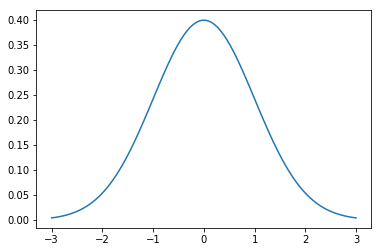

In [5]:
from scipy.stats import norm

r = linspace(-3,3,100)
f = norm.pdf(r)
plot(r,f)

## Importing your own libraries
You can also include functions from your own libraries. I've created a file called RWSlib.py with a text editor, and included the definition of the expSmooth() function as:

~~~~
def expSmooth(t,T,tau):        # returns a smoothed version of T with time constant tau
    Ts = T.copy()              # another vector for the smoothed data
    for i in range(1,len(Ts)): # here's where the actual smoothing happens
        dt = t[i]-t[i-1]
        w = min(dt/tau,1)
        Ts[i] = Ts[i-1] * (1-w) + T[i] * w
    return Ts                  # return the smoothed data
~~~~
expSmooth will be imported so I can use it in this code. This technique will let me use the same code in many different notebooks. I made a copy of the library as RWSlib1 right in the current directory so python can find it immediately.

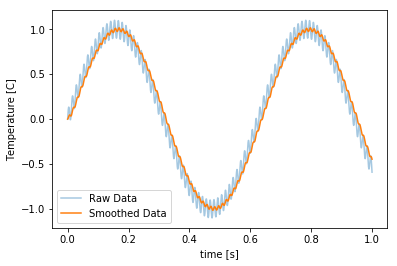

In [7]:
from RWSlib1 import *

Ts = expSmooth(t,T,tau)

plot(t,T, alpha = 0.4, label = 'Raw Data')
plot(t,Ts, label = 'Smoothed Data')
xlabel('time [s]')
ylabel('Temperature [C]')
legend()

## Adding a directory to the python path to find your libraries
This code will add a path. I used a path into my documents folder so that Mac OS will copy the latest versions of my library files over to all my machines automatically.

In [8]:
import sys
sys.path.append("/Users/sellensr/Documents/PythonLibs") # go to user python directory

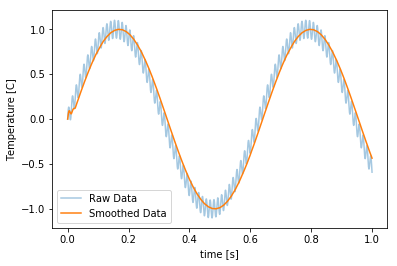

In [9]:
from RWSlib import *

Ts = movingAverage(T,50)

plot(t,T, alpha = 0.4, label = 'Raw Data')
plot(t,Ts, label = 'Smoothed Data')
xlabel('time [s]')
ylabel('Temperature [C]')
legend()